# Bayesian Hierarchical Test

Module `hierarchical` in `bayesiantests` compares the performance of two classifiers that have been assessed by *m*-runs of *k*-fold cross-validation on *q* datasets. It returns probabilities that, based on the measured performance, one model is better than another or vice versa or they are within the region of practical equivalence.


We will load the 10-folds, 10-runs cross-validation results of the Model 5 and Medvedeva model on 9 datasets corisponding to the articles. Then we calculate the differences of accuracies in the $10 \times 10=100$ (columns) ripetions and 9 datasets (rows). 

In [6]:
import numpy as np
import os 

med=[]
for art in os.listdir("medvedeva2/") :
    med.append(np.loadtxt("medvedeva/"+art))
model=[]
for art in os.listdir("results/") :
    model.append(np.loadtxt("results/"+art))
scores=[]
for i in range(9) :
    diff = model[i] - med[i]
    scores.append(np.reshape(diff,100,'float'))      
names = ("Medvedeva", "Model 5")
print(scores)                    

[array([ 0.14285714,  0.02678571, -0.16071429,  0.01785714, -0.24107143,
        0.15178571, -0.02678571,  0.41964286, -0.0625    , -0.02678571,
        0.        ,  0.14285714,  0.        , -0.07142857, -0.07142857,
        0.07142857,  0.28571429, -0.14285714, -0.21428571,  0.14285714,
       -0.14285714, -0.28571429,  0.28571429,  0.35714286, -0.07142857,
       -0.35714286,  0.14285714,  0.35714286, -0.07142857,  0.07142857,
       -0.07142857, -0.21428571, -0.07142857,  0.        , -0.07142857,
        0.14285714,  0.35714286,  0.35714286, -0.07142857, -0.07142857,
       -0.21428571, -0.07142857, -0.07142857, -0.14285714, -0.14285714,
       -0.28571429,  0.21428571, -0.07142857,  0.        , -0.35714286,
        0.07142857, -0.21428571,  0.28571429, -0.14285714,  0.35714286,
        0.28571429,  0.14285714, -0.21428571,  0.21428571,  0.28571429,
       -0.14285714,  0.        ,  0.28571429,  0.07142857, -0.14285714,
       -0.21428571,  0.        , -0.14285714,  0.28571429,  0.0

### Summarizing probabilities
Function `hierarchical(scores,rope,rho, verbose, names=names)`  computes the Bayesian hierarchical test and returns the probabilities that the difference (the score of the first classifier minus the score of the first) is negative, within rope or positive.

In [7]:
import pystan

In [23]:
import bayesiantests as bt    
rope=0.08 #we consider two classifers equivalent when the difference of accuracy is less that 1%  
rho=1/10 #we are performing 10 folds, 10 runs cross-validation
pleft, prope, pright=bt.hierarchical(scores,rope,rho)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_33bc9a7b9c23a55d1f884ac889fca027 NOW.
/anaconda2/envs/py3k/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):



The first value (<code>left</code>) is the probability that the the differences of accuracies is negative (and, therefore, in favor of Medvedeva). The third value (<code>right</code>) is the probability that the the differences of accuracies are positive (and, therefore, in favor of Model 5). The second is the probability of the two classifiers to be practically equivalent, i.e., the difference within the rope.

If we add arguments `verbose` and `names`, the function also prints out the probabilities.

In [24]:
pl, pe, pr=bt.hierarchical(scores,rope,rho, verbose=True, names=names)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_33bc9a7b9c23a55d1f884ac889fca027 NOW.
/anaconda2/envs/py3k/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


P(Medvedeva > Model 5) = 0.0235, P(rope) = 0.9685, P(Model 5 > Medvedeva) = 0.008


The posterior distribution can be plotted out:
1. using the function `hierarchical_MC(scores,rope,rho, names=names)` we generate the samples of the posterior
2. using the function `plot_posterior(samples,names=('C1', 'C2'))` we then plot the posterior in the probability simplex

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_33bc9a7b9c23a55d1f884ac889fca027 NOW.
/anaconda2/envs/py3k/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


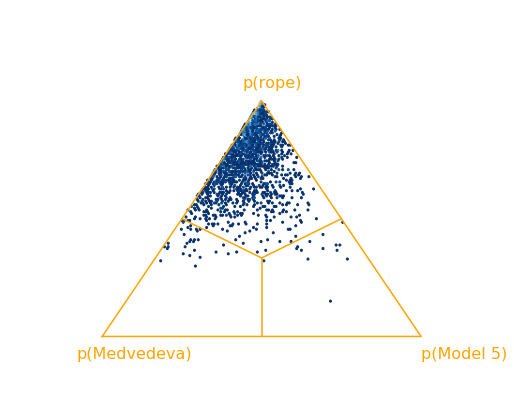

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

samples=bt.hierarchical_MC(scores,rope,rho, names=names)

#plt.rcParams['figure.facecolor'] = 'black'

fig = bt.plot_posterior(samples,names)
plt.savefig('triangle_hierarchical.png',facecolor="black")
plt.show()

It can be seen that the posterior mass is in the region in favor of HNB and so it confirms that the classifier is better than NBC. From the posterior we have also an idea of the magnitude of the uncertainty and the "stability" of our inference.

### References


`@ARTICLE{bayesiantests2016,
   author = {{Benavoli}, A. and {Corani}, G. and {Demsar}, J. and {Zaffalon}, M.},
   title = "{Time for a change: a tutorial for comparing multiple classifiers through Bayesian analysis}",
   journal = {ArXiv e-prints},
   archivePrefix = "arXiv",
   eprint = {1606.04316},
   url={https://arxiv.org/abs/1606.04316},
   year = 2016,
   month = jun
}`

`@article{corani2016unpub,
title = { Statistical comparison of classifiers through Bayesian hierarchical modelling},
author = {Corani, Giorgio and Benavoli, Alessio and Demsar, Janez and Mangili, Francesca and Zaffalon, Marco},
url = {http://ipg.idsia.ch/preprints/corani2016b.pdf},
year = {2016},
date = {2016-01-01},
institution = {technical report IDSIA},
keywords = {},
pubstate = {published},
tppubtype = {article}
}`

